In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_12968\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [3]:
m10_v10_L2_s3=torch.tensor([[[100.0000,  75.1168,  27.5862,   9.5541,  94.8200],
         [100.0000,  87.1795,  29.6296,   4.1353,  96.1600],
         [ 99.6744,  65.8716,  42.8571,  17.6991,  95.9000],
         [ 99.3070,  69.4444,   0.0000,   7.6923,  98.2600],
         [ 99.7263,  76.7857,   0.0000,  21.7391,  99.2900],
         [ 99.8590,  86.2069,   0.0000,   8.3333,  99.6600],
         [ 99.7492,  78.5714,   0.0000,   0.0000,  99.6600],
         [ 99.8397,  56.2500,   0.0000, 100.0000,  99.7700]],

        [[100.0000,  88.4983,  46.8900,   7.7640,  78.4500],
         [ 99.8240,  74.7091,  35.7664,   7.3684,  83.6900],
         [ 99.1888,  69.6679,  14.2857,   6.7449,  90.6100],
         [ 99.2889,  76.7281,  26.8293,   5.2632,  94.9500],
         [ 99.6601,  65.6842,  13.8889,  10.6667,  97.0700],
         [ 99.7448,  68.7151,   0.0000,   0.0000,  98.9300],
         [ 99.7777,  60.6061,   0.0000,   0.0000,  99.3300],
         [ 99.7691,  75.0000,   0.0000,   0.0000,  99.6700]],

        [[100.0000,  83.1741,  44.6849,   8.7688,  42.9900],
         [100.0000,  77.2425,  36.4319,   9.2836,  60.4100],
         [ 96.3470,  64.9721,  29.8274,   8.9770,  69.7600],
         [ 97.6059,  57.9981,  21.8075,  12.7907,  82.5600],
         [ 98.9765,  58.4615,  28.7671,  11.1111,  92.8300],
         [ 99.5072,  66.2679,  33.3333,   0.0000,  97.8100],
         [ 99.6550,  72.4638,  37.5000,   0.0000,  99.2300],
         [ 99.7794,  66.6667, 100.0000,   0.0000,  99.6900]],

        [[100.0000,  81.8056,  36.5880,  10.0980,  21.0700],
         [ 96.6942,  64.1466,  25.8511,   8.0968,  31.6200],
         [ 84.2031,  47.7064,  22.3697,  14.0360,  45.9700],
         [ 92.3252,  50.4970,  21.7799,  11.2128,  67.1200],
         [ 98.4519,  64.1249,  38.8535,  24.3902,  91.5500],
         [ 99.4562,  77.8607,  47.0588,   0.0000,  98.4000],
         [ 99.8898,  80.9524,   0.0000,   0.0000,  99.8500],
         [ 99.9300,   0.0000,   0.0000,   0.0000,  99.9300]],

        [[ 85.4839,  87.4636,  48.0409,   9.0132,  16.7600],
         [ 90.0474,  57.1869,  25.9969,   9.5537,  20.1800],
         [ 81.2601,  44.6260,  19.6193,   9.3784,  31.3200],
         [ 84.4651,  41.8361,  20.0119,   9.2334,  55.0700],
         [ 97.2065,  67.6850,  35.2941,  11.1111,  91.4400],
         [ 99.6131,  77.9070,  33.3333,   0.0000,  99.2000],
         [ 99.9900,   0.0000,   0.0000,   0.0000,  99.9900],
         [100.0000,   0.0000,   0.0000,   0.0000, 100.0000]],

        [[100.0000,  85.7143,  48.4716,  10.0685,  13.5900],
         [100.0000,  69.5652,  27.4896,   9.2641,  15.7100],
         [ 79.2793,  46.7470,  19.6224,   8.2195,  21.2700],
         [ 73.5828,  42.4071,  25.1460,  12.1753,  44.6900],
         [ 96.0955,  69.4313,  46.3918,  83.3333,  92.2300],
         [ 99.9800,   0.0000,   0.0000,   0.0000,  99.9800],
         [100.0000,   0.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000, 100.0000]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05], dtype=torch.float64)


m10_v10_L2_s3.size()

torch.Size([6, 8, 5])

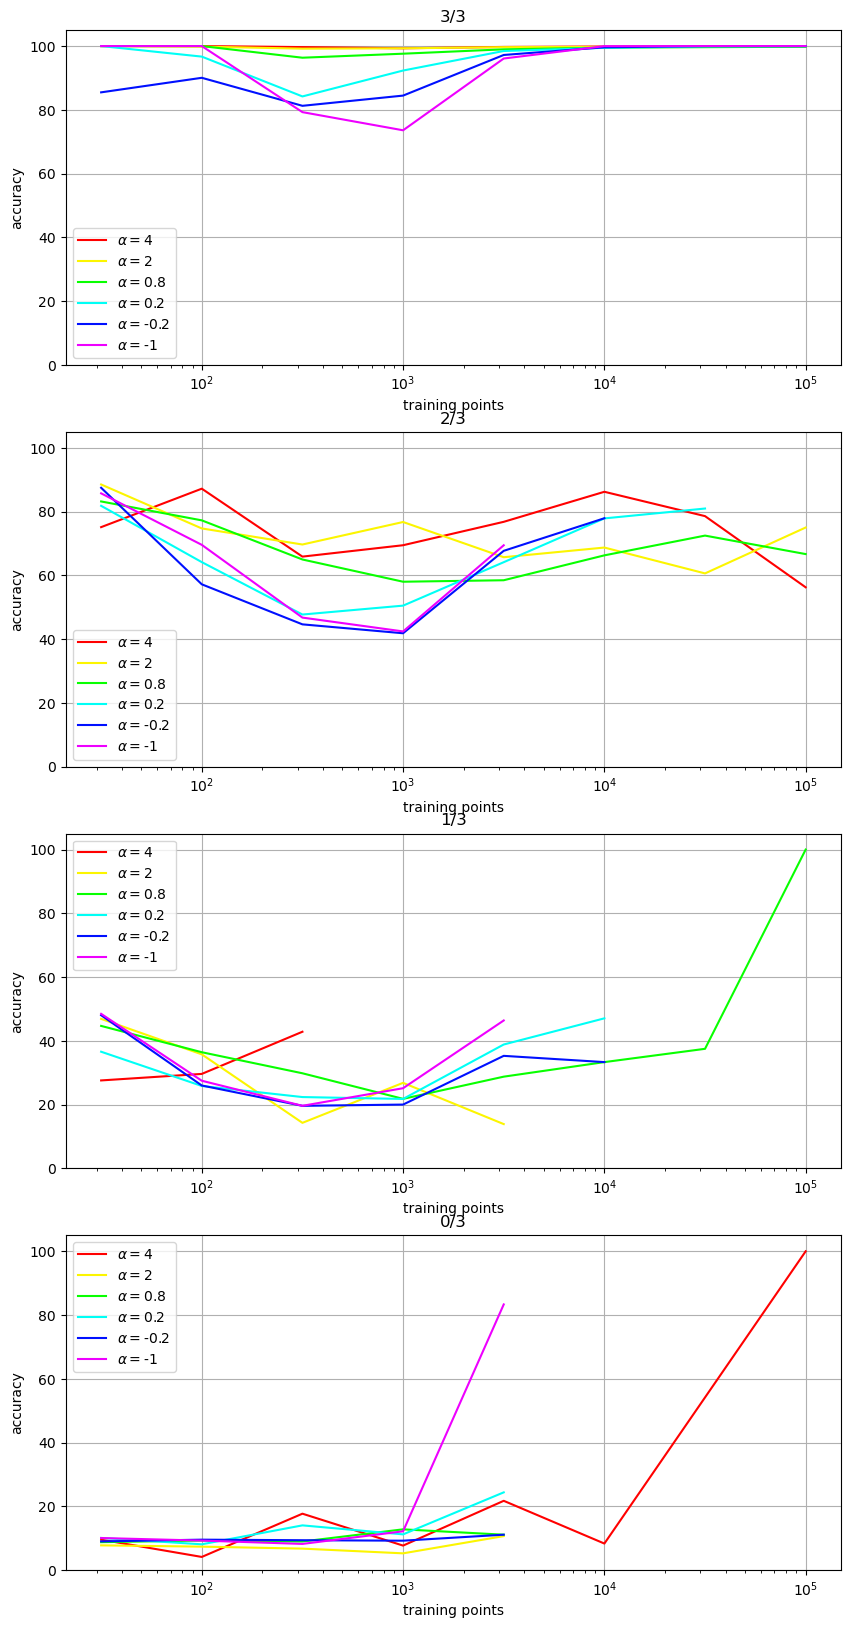

In [3]:
fig, axis = plt.subplots(4, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["3/3", "2/3", "1/3","0/3"]
for i in range(4):
    for j in range(6):
        data = m10_v10_L2_s3[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=r"$\alpha=$"+f'{temperature_list[j]}')
    axis[i].legend()
    axis[i].set_ylim(0, 105)
    axis[i].set_title(title_list[i])
    axis[i].grid()
    axis[i].set_xlabel("training points")
    axis[i].set_ylabel("accuracy")


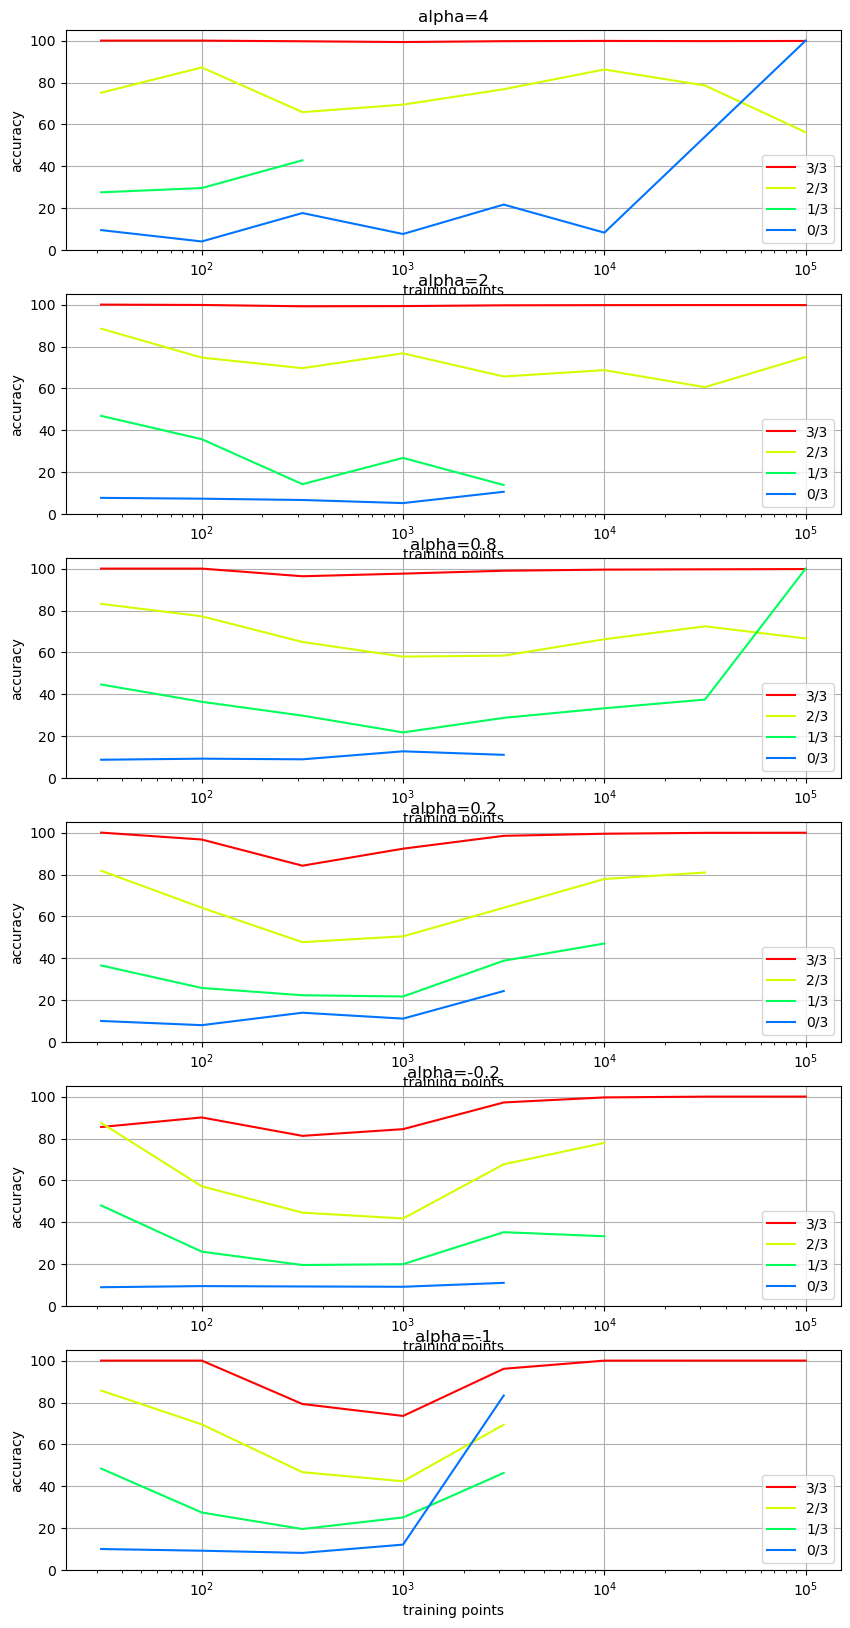

In [4]:
fig, axis = plt.subplots(6, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["3/3", "2/3", "1/3","0/3"]
for j in range(6):
    for i in range(4):
        data = m10_v10_L2_s3[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5), label=title_list[i])
    axis[j].legend()
    axis[j].set_ylim(0, 105)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    